<a href="https://colab.research.google.com/github/VivianKingasia/Employee-Turnover-Project/blob/main/Employee%20Turnover%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORING EMPLOYEE TURNOVER RATES

## Problem Statement

In the last two decades, 2021 holds the highest rates of resignation and employee turnover rates that organizations have witnessed. 
In 2021 alone, 47.8 million people quit their jobs. This was an estimated 4 million people per month. Although this phenomenon,
which has been termed as the 'Great Resignation' happened majorly in the United States and other western countries, it does not
mean that organizations in Africa are immune. This trend of employees quitting their jobs has continued into 2022 causing concerns to
many organizations who are incurring losses in hiring and retraining new staff only for them to quit before they have capitalized
on that investment. Many studies have been done on factors that influence employee turnover. Some of the findings state that employees
tend to want aspects such as adequate monetary compensation and benefits but also non-monetary aspects such as shared identity and values
with the organization, good organization culture and working environment, meaningful and challenging work, good interpersonal connections with 
fellow employees, understanding and open management amongst many other factors. This project is a predictive analysis using machine 
learning algorithms to predict which employees are likely to quit and which are not based on various factors in relation to the data collected.

## Objectives
- To to come up with an exploratory data analysis process showing who you are analyzing the data
- To Capture insights you are noticing during the exploratory data analysis;
- To use predictive analytics to predict likelihood of turnover.


### Questions 
- What factors affect employee turnover?
- Is there some sense of organizational loyalty displayed by employees?
- Why would high performing employees who are satisfied with their organizations leave?
- Is salary a big motivator over intrinsic factors for staying or leaving an organization?
- Is productivity rewarded in this organization?

## Data Understanding

The dataset provided contains ten columns;
- satisfaction_level - Employee satisfaction level
- last_evaluation    -Last time employees were evaluated by management
- number_project     - The number of projects employees have taken on
- average_monthly_hours - Average monthly hours employees have worked
- time_spend_company    - Time the employee has been with the company in years
- work_accident         - Whether or not an employee has experienced an accident
- promotion_last_5years - Whether or not an employee has been promoted in the last 5 years
- sales                 - Department of employee
- Salary                  - Salary level of employee
- left                    - Whether or not an employee quit the organization

## Loading all Relevant Libraries

In [1]:
# Exploring all relevant libraries

import pandas as pd
import numpy as np

# visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# preprocesing

from pycaret.classification import *

# modeling libraries
# !pip install pyCaret



In [2]:
# importing data

data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The dataset seems to have no null values.

## Data Cleaning

In [4]:
# Checking for missing values

data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

In [5]:
# Checking for duplicated values

data.duplicated().sum()

3008

In [6]:
# Exploring the dataframe with duplicates

duplicates = data[data.duplicated()]
duplicates

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
396,0.46,0.57,2,139,3,0,0,sales,low,1
866,0.41,0.46,2,128,3,0,0,accounting,low,1
1317,0.37,0.51,2,127,3,0,0,sales,medium,1
1368,0.41,0.52,2,132,3,0,0,RandD,low,1
1461,0.42,0.53,2,142,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [7]:
# Exploring one entry that has been duplicated 

data[(data["satisfaction_level"] == 0.46) & (data["average_montly_hours"] == 139)& (data["salary"] == "low")]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
23,0.46,0.57,2,139,3,0,0,sales,low,1
396,0.46,0.57,2,139,3,0,0,sales,low,1
12023,0.46,0.57,2,139,3,0,0,sales,low,1
12396,0.46,0.57,2,139,3,0,0,sales,low,1
14234,0.46,0.57,2,139,3,0,0,sales,low,1
14607,0.46,0.57,2,139,3,0,0,sales,low,1


In [8]:
data[(data["satisfaction_level"] == 0.41) & (data["average_montly_hours"] == 128)& (data["salary"] == "low") & (data["last_evaluation"] == 0.46)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
28,0.41,0.46,2,128,3,0,0,accounting,low,1
866,0.41,0.46,2,128,3,0,0,accounting,low,1
12028,0.41,0.46,2,128,3,0,0,accounting,low,1
14239,0.41,0.46,2,128,3,0,0,accounting,low,1


It seems these are duplicated rows and therefore have to be deleted.

In [9]:
# dropping duplicates
data.drop_duplicates(keep = "first", inplace = True)

In [10]:
# checking if dataset has dropped duplicates
data.duplicated().sum()

0

In [11]:
# renaming column
data.rename(columns={'sales' : 'department'}, inplace=True)

In [12]:
# checking to see changes
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


## Exploratory Data Analysis

In [14]:
data.shape

(11991, 10)

The dataset has 11,991 rows and 10 columns.

In [15]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.016929,0.166041
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.129012,0.372133
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Looking the at the statistics, it is interesting to see the variances from min to max on level of satisfaction, evaluation, time 
spent at the company and average monthly hours.

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Text(0.5, 1.0, 'Distribution of Employees Across different Salary Levels ')

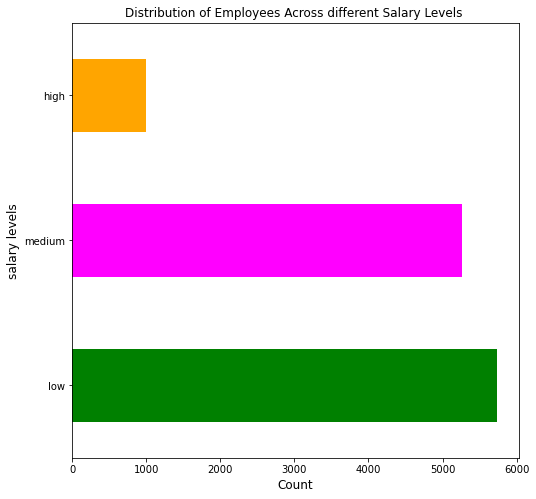

In [ ]:
# Exploring the salary column
c = ['green', 'magenta', 'orange']
data["salary"].value_counts().plot(kind="barh", color = c, figsize=(8, 8))
plt.ylabel("salary levels", size=12)
plt.xlabel("Count", size=12)
plt.title("Distribution of Employees Across different Salary Levels ")

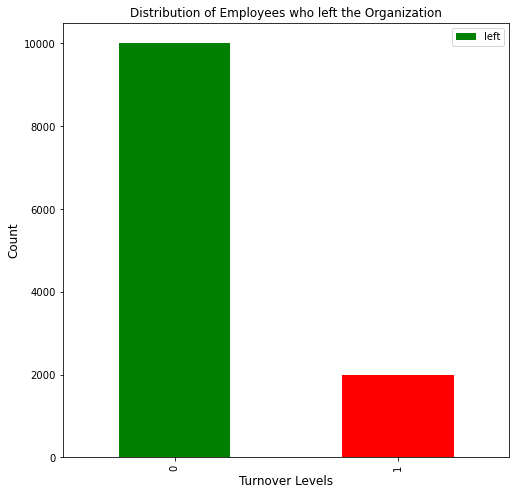

In [ ]:
c = ['green', 'red']
data["left"].value_counts().plot(kind="bar", color = c, figsize=(8, 8))
plt.xlabel("Turnover Levels", size=12)
plt.ylabel("Count", size=12)
plt.title("Distribution of Employees who left the Organization")
plt.legend()

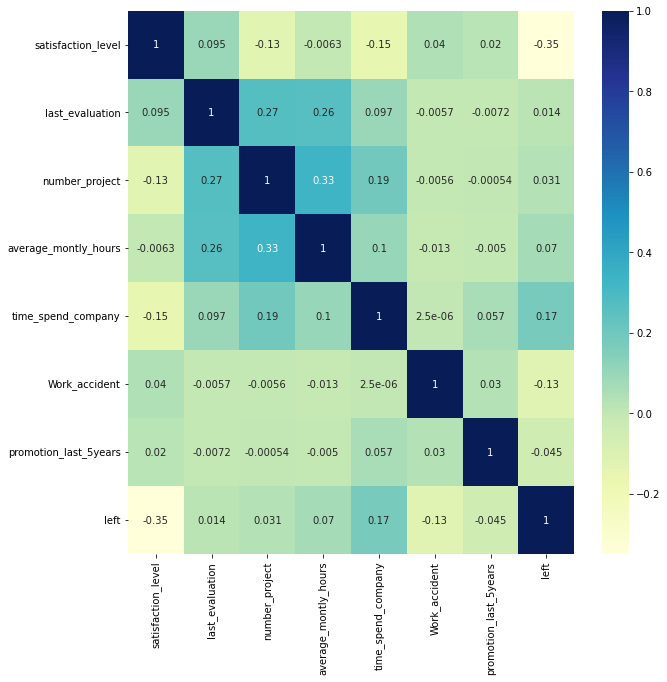

In [ ]:
# Creating a correlation Matrix

corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is no multicollinearity between the features. The highest correlation is 0.33 which shows the correlation between 
number of projects and average monthly hours.

In [ ]:
# Exporting cleaned dataframe to csv file

# data.to_csv("HR_cleaned.csv")

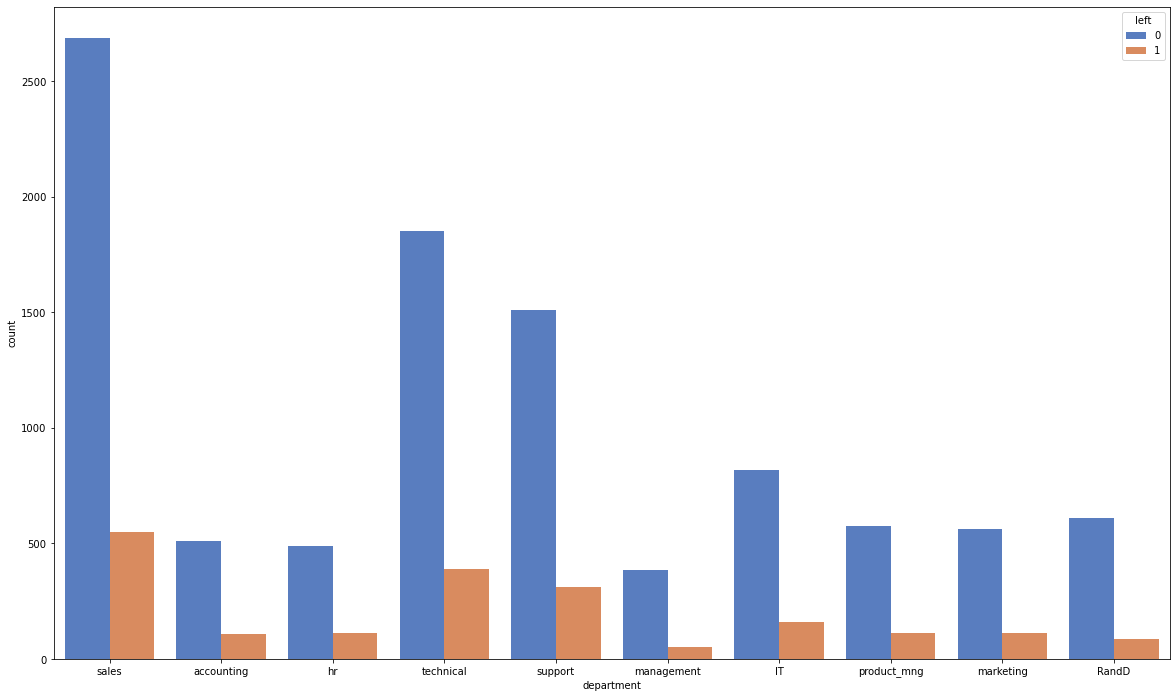

In [ ]:
plt.figure(figsize=[20,12])
ax = sns.countplot(x="department", hue="left", data=data, palette= "muted")

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Exploring why an employee with a high satisfaction and performance level would quit.

In [ ]:
data[(data["satisfaction_level"] > 0.7) & (data["last_evaluation"]> 0.8) & (data["left"] == 0) & (data["promotion_last_5years"]==0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2007,0.99,0.91,5,136,4,0,0,sales,low,0
2018,0.89,0.92,4,165,5,0,0,hr,medium,0
2020,0.79,0.97,5,266,2,0,0,technical,medium,0
2027,0.92,0.93,4,208,3,0,0,technical,medium,0
...,...,...,...,...,...,...,...,...,...,...
11965,0.84,0.81,4,236,3,1,0,IT,low,0
11967,0.82,0.82,3,148,3,0,0,IT,low,0
11971,0.85,0.89,4,150,3,0,0,accounting,high,0
11976,0.90,0.82,3,133,8,0,0,marketing,medium,0


Many of the employees who had a satisfaction level of above 0.7 and evaluation value of above 0.8 and left had no promotion. We could
attribute to the reason of them leaving as being without promotion, only one of them ones who left in this cluster had a promotion
and this can be due to other reasons such as medium salary or a highly demanding department of sales.

In [ ]:
data["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [ ]:
data["Work_accident"].value_counts(normalize=True)

0    0.845718
1    0.154282
Name: Work_accident, dtype: float64

15% of the employees got accidents. HOwever only 5% of those who got accidents quit their jobs. This means that accidents is not a major factor in this dataset for quitting the organization.

Employee Loyalty

In [ ]:
# Exploring the concept of organizational loyalty for employees who have spent a long time at the company

data[(data["time_spend_company"] > 7) & (data["left"] == 0) & (data["promotion_last_5years"] == 0) & (data["salary"] == 'low')].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
11193,0.75,0.60,4,186,10,1,0,marketing,low,0
11195,0.47,0.79,3,284,10,0,0,sales,low,0
11198,0.56,0.87,3,146,10,0,0,sales,low,0
11199,0.84,0.85,4,207,10,0,0,sales,low,0
11226,0.57,1.00,4,227,10,0,0,technical,low,0


Those who left after 5 and 6 years all did not have a promotion. Employees with 8 and 10 years did not leave even those without a 
promotion and with low salaries and even low satisfaction levels. This should be explored further.

In [ ]:
# Exploring influence of the number of projects

data[(data["number_project"] == 7) & (data["left"] == 1)].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
2,0.11,0.88,7,272,4,0,0,sales,medium,1
43,0.10,0.80,7,281,4,0,0,technical,low,1
54,0.10,0.92,7,307,4,0,0,support,low,1
56,0.11,0.94,7,255,4,0,0,support,low,1
61,0.11,0.93,7,308,4,0,0,IT,medium,1


People with 2s project had the highest number of those who quit. Probably because they were not challenged enough. All employees 
with 7 projects quit probably because they were overwhelmed with work. The sweet spot of optimal number of projects seems to be 3 projects since those with 3 projects reported the lowest
number of employees who quit.

In [ ]:
# exploring productivity for top employees

data[(data["average_montly_hours"] > 300) & (data["left"] == 1)].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
11,0.11,0.81,6,305,4,0,0,sales,low,1
22,0.09,0.95,6,304,4,0,0,sales,low,1
38,0.11,0.89,6,306,4,0,0,technical,low,1
54,0.10,0.92,7,307,4,0,0,support,low,1
57,0.10,0.81,6,309,4,0,0,technical,low,1


## Preprocessing

### Pycaret

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


#### Checking for outliers

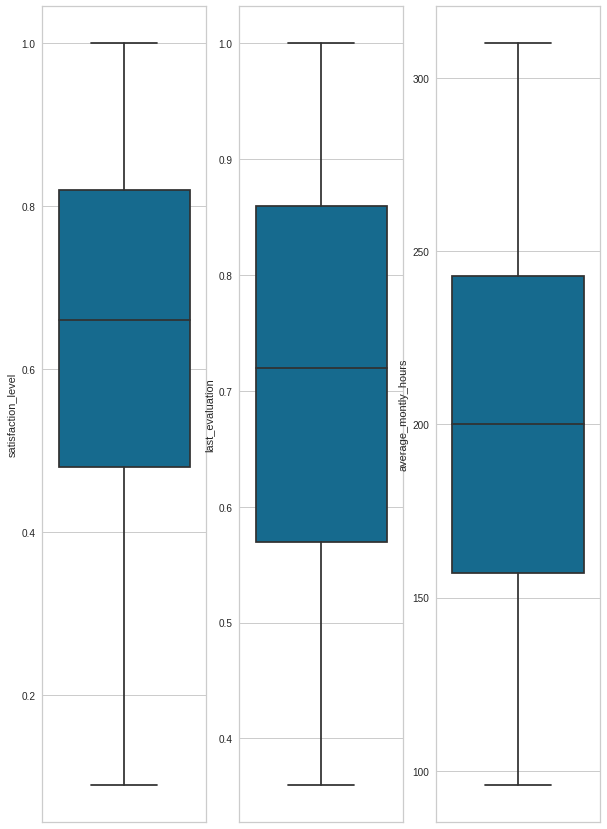

In [22]:
# creating boxplots to explore presence of outliers in these columns

columns = ["satisfaction_level", "last_evaluation", "average_montly_hours"]
fig, ax = plt.subplots (ncols = 3, nrows = 1, figsize = (10, 15))
index = 0
ax = ax.flatten()

for col in data[columns]:
    sns.boxplot(y = col, data = data, ax=ax[index])
    index += 1

There are no outliers in this dataset

In [23]:
# Checking for class imbalance

data.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

There are class imbalances in the target variable which will be addressed by SMOTE

#### Training the Models
##### One Hot Encoding/Normalization/Fixing Class Imbalance

In [17]:
# conducting ordinal encoding

clf1 = setup(data = data, target = 'left', ordinal_features = {'salary' : ['low', 'medium', 'high']}, normalize = True, fix_imbalance = True)



,Description,Value
0,session_id,5979
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11991, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste